![alt text](https://www.business.unsw.edu.au/style%20library/asb/assets/images/logo-unsw.png)

# MARK5828 Week 3: Consumer Search Regression



![alt text](https://www.quertime.com/wp-content/uploads/2014/05/origins_of_samsung-logo.jpg)

# Background

In 2011 November 24th, Samsung has launched an advertising campaign lasting 5 weeks to promote the Samsung Galaxy S II in United States. In their [advertisement](https://www.youtube.com/watch?v=GWnunavN4bQ), they used a comparative advertising marketing strategy, comparing their product to Apple's iPhone. They have explicity stated that the Samsung Galaxy S II is "thin", has a "huge screen" and can utilise "4G" network technology.

**Goal of this tutorial is to examine the impact of Samsung's comparative advertisement and how it has affected the competition with the main competitor (Apple) using consumer search volume data from Google trends.**

# Starting Data

**Note:** Unlike previous tutorials, this will **NOT** be our data used for regression. Later on in the tutorial we will be creating our own data to perform regression on.

In order to examine the Samsung-Apple movement, we will analyse search data on 4 brands:
- Apple
- Blackberry
- HTC
- Samsung

Even though we are specifically interested in Apple vs Samsung, we will include other popular mobile technology brands as **control variables**.

For each brand, we make unique brand pairs: 

Brand Pair | Google Search Queries
--|--
(Apple, Blackberry) | Apple Blackberry OR iPhone Blackberry 
(Apple, HTC) | Apple HTC OR Apple Evo OR iPhone HTC OR iPhone Evo
(Blackberry, HTC) | Blackberry HTC OR Blackberry Evo
(Blackberry, Samsung)| Blackberry Samsung OR Blackberry Galaxy	(Blackberry vs Samsung)
**(Apple, Samsung)** | **Apple Samsung OR Apple Galaxy OR iPhone Samsung OR iPhone Galaxy**
(HTC, Samsung) | HTC Samsung OR HTC Galaxy OR Evo Samsung OR Evo Galaxy

Take the first row for example:

(Apple, Blackberry):	Apple Blackberry OR iPhone Blackberry

**Apple-Blackberry** is the brand pair. When people search up something on the lines of **Apple Blackberry** or **iPhone Blackberry,** this will count as a search query towards the Apple-Blackberry pair.

Now if we account for all of the other brand pairs, we can get a **daily relative Google search interest for each brand pairs**.

Your starting data should look something like:

Apple Blackberry + iPhone Blackberry | Apple HTC + Apple Evo + iPhone HTC + iPhone Evo | Blackberry HTC + Blackberry Evo | Blackberry Samsung + Blackberry Galaxy | Apple Samsung + Apple Galaxy + iPhone Samsung + iPhone Galaxy | HTC Samsung + HTC Galaxy + Evo Samsung + Evo Galaxy | date
--|--
35 | 26 | 6 | 7 | 49 | 24.43665768 | 27-10-2011
26 | 31 | 3 | 8 | 51 | 33.60040431 | 28-10-2011
27 | 25 | 6 | 8 | 51 | 31.56401617 | 29-10-2011
...|...|...|...|...|...|...
25 | 18 | 1 | 4 | 38 | 22.40026954 | 22-01-2012

The data means:

Brand Pair | Relative Interest (for 27-10-2011)
--|--
Apple Blackberry | 35
Apple HTC | 26
Blackberry HTC | 6
Blackberry Samsung | 7
Apple Samsung | 49
HTC Samsung | 24.4

Compared to all other brand pairs, **Apple Samsung** has the biggest web interest (7x more popular than Blackberry Samsung)




# Getting Started

Before you get started, please:
- Read [**Using Google Trends with Python**](https://colab.research.google.com/drive/1ddhahGzGS8XeU0zipX_zGFfkq2a0Yxv3) (accessible from Moodle). We use Google Trends to collect our data.
- Download and upload **week3_helpers.py** and **brand_2011-10-27 2012-01-22.csv **from (accessible from Moodle).

In [0]:
from google.colab import files

# Upload week3_helpers.py, brand_2011-10-27 2012-01-22.csv
files.upload()

Saving week3_helpers.py to week3_helpers.py


{'week3_helpers.py': b'"""\r\nSpecial Utility Functions for MARK5828 Week 3 Tutorial Content. The functions saved here are unnecessary for the students to learn, but they can read if they are curious.\r\nAuthor: James Lin\r\n"""\r\n\r\nfrom itertools import product, combinations\r\nfrom functools import reduce\r\n\r\nimport matplotlib.pyplot as plt\r\nimport numpy as np\r\n\r\ndef chunker(seq, size):\r\n    """\r\n    [YOU DO NOT NEED TO LEARN THIS]\r\n    Iterates by chunk size rather than 1 at a time\r\n    """\r\n    return (seq[pos:pos + size] for pos in range(0, len(seq), size))\r\n\r\ndef get_keywords_combination(brands, brands_synonyms):\r\n    """\r\n    [YOU DO NOT NEED TO LEARN THIS]\r\n    Creates a list of combinations amongst brands, using brands_synonyms as the\r\n    keyword value.\r\n\r\n    Inputs:\r\n        brands: [\'Apple\', \'Blackberry\', \'HTC\', \'Samsung\']\r\n        brands_synonyms: [\'Apple,iPhone\', \'Blackberry\', \'HTC,Evo\', \'Samsung,Galaxy\']\r\n\r\n 

In [0]:
import math

import numpy as np
import pandas as pd

from sklearn.manifold import MDS

import statsmodels.api as sm

from week3_helpers import chunker, get_keywords_combination, plot_brand_similarity, plot_brand_distance, plot_similarity_map

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
"""Variable Definitions"""

BRANDS= ['Apple', 'Blackberry', 'HTC', 'Samsung']
BRANDS_SYNONYMS = ['Apple,iPhone', 'Blackberry', 'HTC,Evo', 'Samsung,Galaxy']
TIMEFRAME = "2011-10-27 2012-01-22"

df = pd.read_csv("brand_" + TIMEFRAME + ".csv") # Google Trends Data
dates = df.pop("date")                          # Remove "date" column from df and store it into variable "dates"

start = list(dates).index("2011-11-24")         # Advertising campaign starts on 24/11/2011
end = start + 5 * 7                             # Advertising campaign goes for 5 weeks (35 days)

# Creating a Similarity Matrix

**We will make an assumption that the relative web interest for each brand pair represents the similarity.** Similarity is a numeric measure that quantifies how close two items are to each other in terms of web search. Strictly speaking, there are many ways to calculate similarity such as cosine similarity and euclidean distance. In this example, we're simply going to use the relative web interest value as our similarity measure.



Brand Pair | Relative Interest (for 27-10-2011) | Brand Pair Similarity (for 27-10-2011)
--|--
Apple Blackberry | 35 | 35
Apple HTC | 26 | 26
Blackberry HTC | 6 | 6
Blackberry Samsung | 7 | 7
Apple Samsung | 49 | 49
HTC Samsung | 24.4 | 24.4

For this 27-10-2011 data, we can transform it into a **similarity matrix**.

- | Apple | Blackberry | HTC | Samsung
--|--
Apple | 100 | 35 | 26 | 49
Blackberry | 35 | 100 | 6 | 7
HTC | 26 | 6 | 100 | 28
Samsung | 49 | 7 | 28 | 100

In Python, we will use a custom function **create_similarity_matrix** to perform this transformation for ALL DATES, and store the result in a dictionary variable **sim_matrix_dict**.

In [0]:
def create_similarity_matrix(df, i):
  """
  Restructures the dataframe into a similarity matrix.
  """
  brands_keywords = get_keywords_combination(
    brands=BRANDS,
    brands_synonyms=BRANDS_SYNONYMS,
  )

  # brands_keywords dictionary with reversed key, values
  brands_keywords_rev = {v: k for k, v in brands_keywords.items()}
  
  new_df = pd.DataFrame(index=BRANDS, columns=BRANDS)
  for name in df.columns:
    brand_1, brand_2 = brands_keywords_rev[name]
    new_df.loc[brand_1, brand_2] = df.loc[i, name] / 100
    new_df.loc[brand_2, brand_1] = df.loc[i, name] / 100
  return new_df.loc[(new_df!=0).any(axis=1)].fillna(1).astype(np.float64)

In [0]:
"""Creates the variable sim_matrix_dict which contains a similarity matrix for each date"""
sim_matrix_dict = {}
for i, date in enumerate(dates):
  sim_matrix_dict[date] = create_similarity_matrix(df=df, i=i)

In [0]:
sim_matrix_dict["2011-10-27"] # Print Similarity Matrix for 27-10-2011

,Apple,Blackberry,HTC,Samsung
Apple,1.00,0.35,0.260000,0.490000
Blackberry,0.35,1.00,0.060000,0.070000
HTC,0.26,0.06,1.000000,0.244367
Samsung,0.49,0.07,0.244367,1.000000


# Multidimensional Scaling (MDS)

It is possible to visualise the similarities on a similarity map (technically a scatter plot) using the data we have. The plot would represent the **relative (x, y) locations** of each brand {Apple, Blackberry, HTC, Samsung}, where brands close to each other on the map represents high similarity . 

To do this, we would need to convert the similarity matrix into (x, y) coordinates for each brand (for each date). This is where **Multidimensional Scaling** comes in.

On a high level, MDS just takes in a similarity matrix and spits out (x, y) coordinates for each brand. 

**You are not required to understand how MDS works, but rather why we are using it in this tutorial.**

From a non-technical point of view, the purpose of multidimensional scaling (MDS) is to provide a visual representation of the pattern of proximities (i.e., similarities or distances) among a set of objects. For example, given a matrix of perceived similarities between various brands of air fresheners, MDS plots the brands on a map such that those brands that are perceived to be very similar to each other are placed near each other on the map, and those brands that are perceived to be very different from each other are placed far away from each other on the map.

The input to MDS is a square, symmetric 1-mode matrix indicating relationships among a set of items. By convention, such matrices are categorized as either similarities or dissimilarities.

In [0]:
def get_x_y(sim_matrix):
  """Converts the similarity matrix into x, y mapped coordinates using Multidimensional Scaling"""
  embedding = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
  res = embedding.fit_transform((1 - np.eye(len(BRANDS))) * (1 - sim_matrix))

  return res[:, 0], res[:, 1]

# Plotting

Here are some visualisations to help us understand our data a bit better. In this part, your goal is just to understand and interpret the plots, and not worry about the code to create the graphs.

In [0]:
def get_dist(name_1, name_2):
  """Get list of distances between two brands using Multidimensional Scaling & Euclidean Distance"""
  result = []
  id1 = BRANDS.index(name_1)
  id2 = BRANDS.index(name_2)
  for date in dates:
    X, Y = get_x_y(sim_matrix_dict[date])                             # MDS
    dist = math.sqrt((X[id1] - X[id2]) ** 2 + (Y[id1] - Y[id2]) ** 2) # Euclidean Distance (with X,Y)
    result.append(dist)
  return result

def get_similarity(name_1, name_2):
  """Get list of similarities between two brands"""
  result = []
  for sim_matrix in sim_matrix_dict.values():
    result.append(sim_matrix.loc[name_1][name_2])
  return result

In [0]:
"""Initialise Brand-to-Apple distance dataframe"""
app_dist = pd.DataFrame(index=dates)
for item in BRANDS:
  app_dist[item] = get_dist("Apple", item)

"""Initialise Brand-to-Apple similarity dataframe"""
app_sim = pd.DataFrame(index=dates)
for brand in BRANDS:
  app_sim[brand] = get_similarity("Apple", brand)

## Similarity Plot for each Date

In [0]:
x_coords = []
y_coords = []
for sim_matrix in sim_matrix_dict.values():
  x, y = get_x_y(sim_matrix)
  x_coords.append(x)
  y_coords.append(y)

Legend for the the following Plot:

```
{
  Red: Apple,
  Black: Blackberry,
  Green: HTC,
  Blue: Samsung
}
```

In the title for each subplot, *d*  represents the **euclidean distance** (Shortest distance between two points) between Apple and Samsung.

![alt text](https://ars.els-cdn.com/content/image/3-s2.0-B9780128038185000093-f09-18-9780128038185.jpg)

The euclidean distance, based on the diagram above is calculated by:
$ d = \sqrt(x_i-x_j)^2+(y_i-y_j)^2 $

A **bolded** title represents a date during the comparative advertising campaign.



<font color='Red'>Warning: Following code takes a while to run</font>

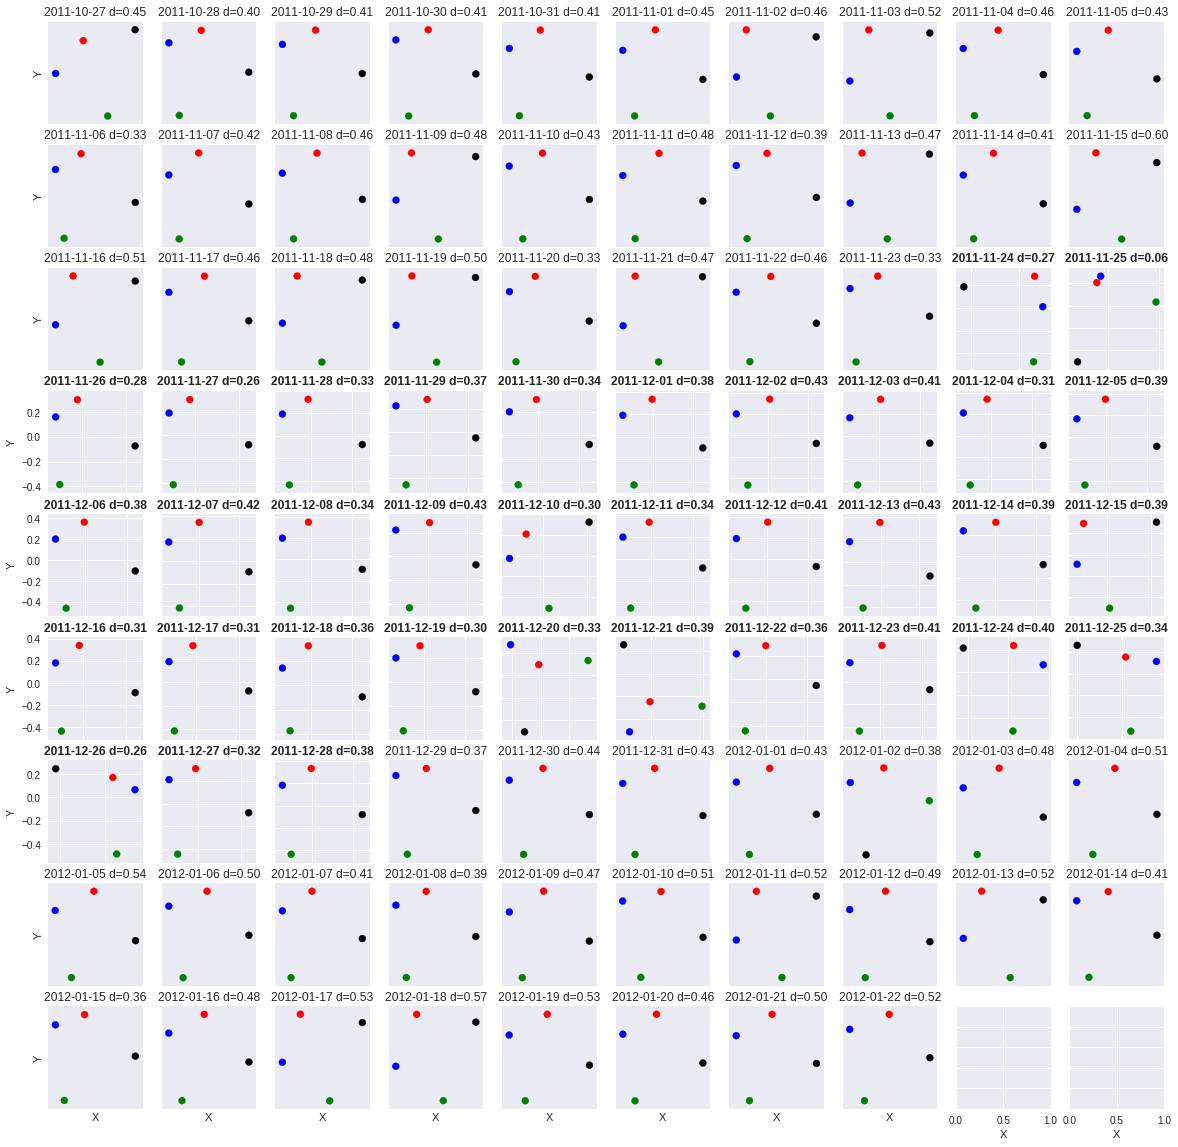

In [0]:
"""Warning: Takes a while to run"""
plot_similarity_map(app_dist, dates, start, end, get_dist, x_coords, y_coords)

## Brand-to-Apple Similarity

Let's plot how brand similiary to apple changes everyday. The red region represents the time the marketing ad campaign was broadcasted in the US.

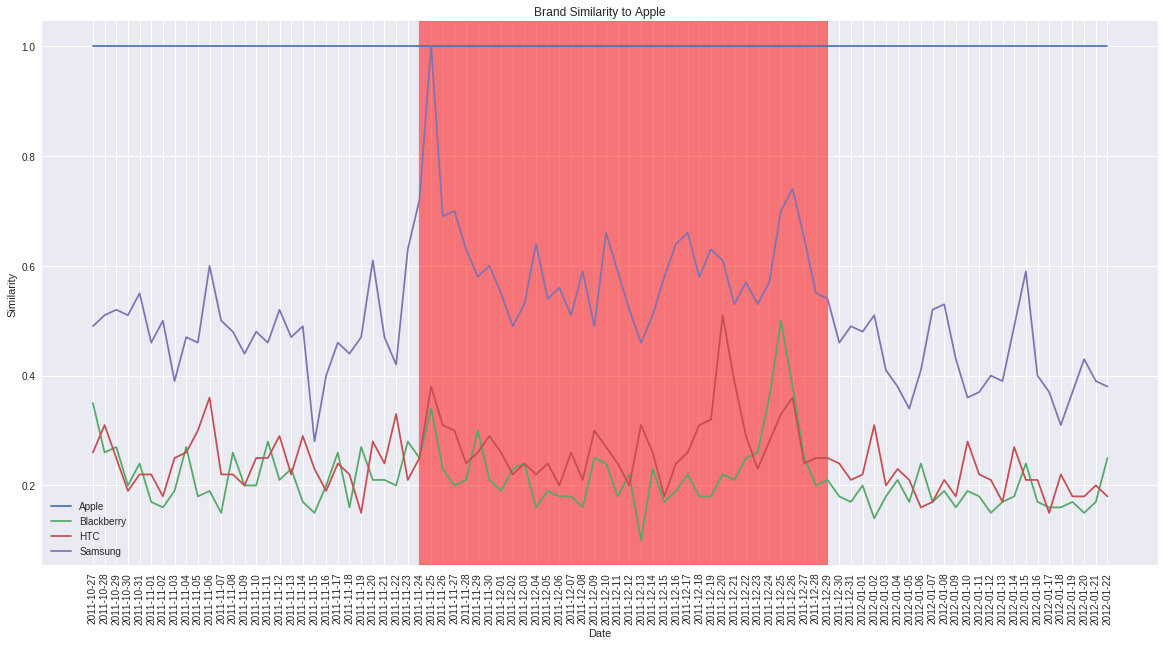

In [0]:
plot_brand_similarity(app_sim, dates, start, end)

## Brand-to-Apple Distance

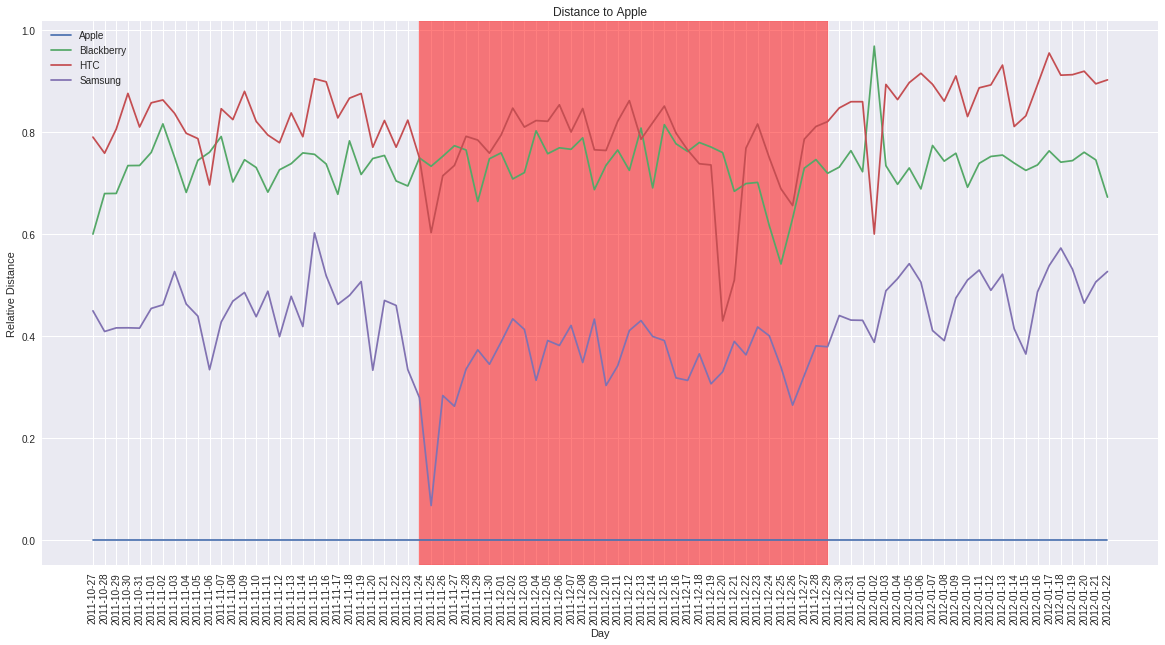

In [0]:
plot_brand_distance(app_dist, dates, start, end)

# Linear Regression

### Aim

Suppose this:

We want to determine how effective a medicine is for a particular sickness. In order to measure its effectiveness, we need to
- Measure the "sickness level" of the person (person A) **before** and **after** the a time period (WITH treatment).
- Measure the "sickness level" of another person (person B) **before** and **after** the same time period (WITHOUT treatment)
- Compare those differences.

- | Treated Group (uses Medicine) | Control Group (no Medicine)
--|--
Sickness Level Before | A | B
Sickness Level After  | C | D

Effectiveness of the treatment: 

$E = (C - A) - (D - B) $

We can represent this data in a dataframe:

sickness_level {0-10} | is_treated | time_after | is_treated * time_after
--|--
8 | 0 | 0 | 0x0=0
5 | 0 | 1 | 0x1=0
8 | 1 | 0 | 1x0=0
2 | 1 | 1 | 1x1=1

If we perform linear regression on the above data, we get an equation

$ sicknessLevel = const + m_1.isTreated + m_2.timeAfter + m_3.isTreated.timeAfter $


for **Scenario A (Treated, Before)**:

$ sicknessLevel = const +  m_1(1) + m_2(0) + m_3(1)(0) $

$ sicknessLevel = const +  m_1 $


for **Scenario B (Control Before)**:

$ sicknessLevel = const $

for **Scenario C (Treated, After)**:

$ sicknessLevel = const + m_1 + m_2 + m_3 $

for **Scenario D (Control, After)**:

$ sicknessLevel = const + m_2 $


Therefore, the effect of the treatment can be quantified:

$E = (C - A) - (D - B) $

$E = ((const + m_1 + m_2 + m_3) - (const +  m_1)) - ((const + m_2) - (const)) $

$E = (m_2 + m_3) - (m_2) $

$E = m_3 $

Therefore, the **coefficient** of the **is_treated*time_after** column from performing Linear Regression is a measure of the effectiveness of the treatment.

Now let's apply this to our Samsung vs Apple scenario and replace some words.

- **Medicine**: Performs Comparative Advertising.
- **Sickness Level**: The distance to Apple.
- **Treatment Group**: Samsung.
- **Control Group**: Blackberry and HTC.
- **Before**: Before the Comparative Advertising Campaign.
- **After**: During the Comparative Advertising Campaign.


## Data Variables

Variable | Type | Description | Why do we need this?
--|--
app_dist | Float | Euclidean Distance from Apple (from MDS) | This is our *y* variable!
brand_pair | String | Brand of Interest {Samsung, Blackberry, HTC} | These contain our treatment and control groups.
day | String | Date {27-10-2011 - 22-01-2012} | These are control variables (see below for explanation)
during | Boolean | During **Samsung's** Advertising Campaign (this is **is_treated * time_after**) | To see how effective the ad was during the campaign.
after | String | After **Samsung's** Advertising Campaign (grouped in weeks) (this is also **is_treated * time_after**) | To see how effective the ad was after the campaign.

Note that **brand_pair**, **day**, and **after** become dummified later on.

**Why do we need day variables?**

To control the effect of a particular day on our results. 

Consider this:

**Event**

On 25/12/2011, Apple, Microsoft, HTC, Blackberry stores all have a Christmas sale. Also many people are off work, and are looking to buy a new phone. They will search online for some new phones.

**Effect**

The distance between {Microsoft, HTC, Blackberry} and Apple is most like to decrease.

**Why is this important?**

The distance decrease is caused from Christmas! It is NOT caused from Samsung's Advertisement!

## Creating our Data

For **after**, we want to categorise it by weeks.

- First 7 days after the marketing campaign has finished will be **week_1**
- Next 7 days would be **week_2**
- And so on.

The code in the cell below helps create our **after** variable.

Note: In the output, 30-12-2011 represents the first day after the end of the marketing campaign.

In [0]:
"""
You are not required to understand the code here, but rather what after_var represents.
After after_var has been defined, we will use it to help define our data defined in the Table above
"""
after_var = pd.Series()
for i, item in enumerate(chunker(dates[end+1:], 7)):
  item_copy = item.copy()
  item_copy[:] = "week_" + str(i+1)
  after_var = after_var.append(item_copy)
after_var.index = dates[end+1:]
print(after_var)

date
2011-12-30    week_1
2011-12-31    week_1
2012-01-01    week_1
2012-01-02    week_1
2012-01-03    week_1
2012-01-04    week_1
2012-01-05    week_1
2012-01-06    week_2
2012-01-07    week_2
2012-01-08    week_2
2012-01-09    week_2
2012-01-10    week_2
2012-01-11    week_2
2012-01-12    week_2
2012-01-13    week_3
2012-01-14    week_3
2012-01-15    week_3
2012-01-16    week_3
2012-01-17    week_3
2012-01-18    week_3
2012-01-19    week_3
2012-01-20    week_4
2012-01-21    week_4
2012-01-22    week_4
dtype: object


The code below creates our dataset. Please have a read of the comments to understand how it works.

In [0]:
ad_period_df = pd.DataFrame()                    # Initialise Empty Dataframe (Table)

"""For each iteration in this loop, we are defining a new dataframe (brand_df) for each brand. After defining the new dataframe, we append it to the main dataframe (ad_period_df)"""
for brand in ["Samsung", "HTC", "Blackberry"]:   # Loop through each Brand
  brand_df = pd.DataFrame({
    "app_dist": list(app_dist[brand]),           # Distance from brand to Apple stored in column "app_dist"
    "brand_pair": [brand] * len(dates),          # Brand {Samsung, HTC, Blackberry} stored in "brand_pair" 
    "day": dates,                                # All 88 dates stored in "day"
    "during": [0] * len(dates),                  # During defined as 1 ONLY if brand is Samsung and date is during the marketing campaign (0 otherwise)
    "after": [0] * len(dates)                    # After defined as either week_1, week_2, week_3 or week_4 ONLY if brand is Samsung and date is after the marketing campaign (0 otherwise)
  })
  
  if brand == "Samsung":                         # Conditional Statement to help define the during and after variables
    brand_df.loc[start:end, "during"] = 1
    brand_df.loc[end+1:len(dates), "after"] = list(after_var)
  ad_period_df = pd.concat([ad_period_df, brand_df], axis=0, ignore_index=True)   # Join "brand_df" at the end of "ad_period_df"

In [0]:
ad_period_df.head()

,after,app_dist,brand_pair,day,during
0,0,0.450011,Samsung,2011-10-27,0
1,0,0.409519,Samsung,2011-10-28,0
2,0,0.416580,Samsung,2011-10-29,0
3,0,0.416743,Samsung,2011-10-30,0
4,0,0.416116,Samsung,2011-10-31,0


We then dummify our categorical columns: 'after', 'brand_pair', 'day'.

In [0]:
ad_period_dummies_df = pd.get_dummies(ad_period_df, columns=['after', 'brand_pair', 'day'], drop_first=True)

In [0]:
ad_period_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 95 columns):
app_dist              264 non-null float64
during                264 non-null int64
after_week_1          264 non-null uint8
after_week_2          264 non-null uint8
after_week_3          264 non-null uint8
after_week_4          264 non-null uint8
brand_pair_HTC        264 non-null uint8
brand_pair_Samsung    264 non-null uint8
day_2011-10-28        264 non-null uint8
day_2011-10-29        264 non-null uint8
day_2011-10-30        264 non-null uint8
day_2011-10-31        264 non-null uint8
day_2011-11-01        264 non-null uint8
day_2011-11-02        264 non-null uint8
day_2011-11-03        264 non-null uint8
day_2011-11-04        264 non-null uint8
day_2011-11-05        264 non-null uint8
day_2011-11-06        264 non-null uint8
day_2011-11-07        264 non-null uint8
day_2011-11-08        264 non-null uint8
day_2011-11-09        264 non-null uint8
day_2011-11-10        264 non-nu

The code in the cell below is optional to run if you want to view the data on Excel (may be easier to read)

In [0]:
ad_period_dummies_df.to_csv("helper_file.csv", index=False)

## Training our Data

The line below removes "app_dist" from the dataset and stores it in *y*.

**Note: If you run the line below for a second time, you will get an error: KeyError: 'app_dist'. This means that 'app_dist' doesn't exist in the 'ad_period_dummies_df' dataframe (because 'pop' removes it from the first time you ran it) If this happens to you, you will need to re-initialise the ad_period_dummies_df dataframe (ie run the cell: `ad_period_dummies_df = pd.get_dummies(ad_period_df, columns=['after', 'brand_pair', 'day'], drop_first=True)` again). This is a VERY common error**.

In [0]:
y = ad_period_dummies_df.pop("app_dist")

With our y variable and our X being the remaining data (with an added constant), we can now perform regression!

In [0]:
X = sm.add_constant(ad_period_dummies_df)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               app_dist   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     23.96
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           3.37e-64
Time:                        14:31:52   Log-Likelihood:                 419.78
No. Observations:                 264   AIC:                            -649.6
Df Residuals:                     169   BIC:                            -309.8
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6840      0

Lets see the results sorted by ascending p-value!

The dataframe below looks different from usual because it is two sorted dataframes (non-control variables and control variables) put together.

In [0]:
""" All of this code is just to print out the results nicely for you :) """

# Classifying Columns to non-control, control (sort of hard-coded)
non_control_cols = [column for column in X.columns if column == "during" or "after_week_" in column]
control_cols = [column for column in X.columns if not(column == "during" or "after_week_" in column)]

# Coefficients and p-values
df_coeffs = pd.DataFrame({"Coefficients": model.params, "p": model.pvalues})

# Create two sorted dataframes (1 for non-control; 1 for control)
df_coeffs_sig = df_coeffs.loc[non_control_cols, :]
df_coeffs_control = df_coeffs.loc[control_cols, :]
df_coeffs_sig_sorted = df_coeffs_sig.reindex(df_coeffs_sig["p"].sort_values().index)
df_coeffs_control_sorted = df_coeffs_control.reindex(df_coeffs_control["p"].sort_values().index)

# Print Result
pd.concat([df_coeffs_sig_sorted, df_coeffs_control_sorted], axis=0).style.bar(subset = ["Coefficients", "p"], align='mid', color=['#d65f5f', '#5fba7d'])

,Coefficients,p
during,-0.0705196,0.000285676
after_week_2,-0.0100395,0.75349
after_week_1,-0.00910556,0.775771
after_week_4,0.0099675,0.828287
after_week_3,-0.00132183,0.967014
brand_pair_Samsung,-0.288035,2.69534e-44
const,0.684019,1.69484e-43
brand_pair_HTC,0.0771816,3.15091e-14
day_2011-11-15,0.141169,0.0056451
day_2012-01-17,0.139315,0.00748621


# Conclusion

- **during** has a p-value < 0.05 and a coefficient of -0.111427. This means that we can confidently deduce that **during** Samsung's Comparative Advertising campaign, it has become "closer" to Apple in terms of web searches.
- **after** (ie, after_week_1/2/3/4) has a p-value < 0.05 (except week_4) and a coefficient that is **negative** and **smaller in magnitude** compared to **during**. From this, we can see that after the Comparative Advertising campaign has ended, Samsung still remains "closer" to Apple (compared to before the advertising campaign), but is slowly becoming more distant by each week.